* NAME: RISHABH PATIL
* SAP: 60009200056
* BATCH: K2

In [1]:
import numpy as np
import sys
import matplotlib.pyplot as plt
if "../" not in sys.path:
  sys.path.append("../") 

In [2]:
def value_iteration_for_gamblers(p_h, theta=0.0001, discount_factor=1.0):
    rewards = np.zeros(101)
    rewards[100] = 1 
    V = np.zeros(101)
    def one_step_lookahead(s, V, rewards):
        A = np.zeros(101)
        stakes = range(1, min(s, 100-s)+1) # Your minimum bet is 1, maximum bet is min(s, 100-s).
        for a in stakes:
            A[a] = p_h * (rewards[s+a] + V[s+a]*discount_factor) + (1-p_h) * (rewards[s-a] + V[s-a]*discount_factor)
        return A
    while True:
        delta = 0
        for s in range(1, 100):
            A = one_step_lookahead(s, V, rewards)
            best_action_value = np.max(A)
            delta = max(delta, np.abs(best_action_value - V[s]))
            V[s] = best_action_value         
        if delta < theta:
            break
    policy = np.zeros(100)
    for s in range(1, 100):
        A = one_step_lookahead(s, V, rewards)
        best_action = np.argmax(A)
        policy[s] = best_action
    
    return policy, V

In [3]:
policy, v = value_iteration_for_gamblers(0.25)

print("Optimized Policy:")
print(policy)
print("")

print("Optimized Value Function:")
print(v)
print("")

Optimized Policy:
[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 12. 11. 15. 16. 17.
 18.  6. 20. 21.  3. 23. 24. 25.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.
 11. 12. 38. 11. 10.  9. 42.  7. 44.  5. 46. 47. 48. 49. 50.  1.  2.  3.
  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 11. 10.  9. 17.  7. 19.  5. 21.
 22. 23. 24. 25.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 12. 11.
 10.  9.  8.  7.  6.  5.  4.  3.  2.  1.]

Optimized Value Function:
[0.00000000e+00 7.24792480e-05 2.89916992e-04 6.95257448e-04
 1.16010383e-03 1.76906586e-03 2.78102979e-03 4.03504074e-03
 4.66214120e-03 5.59997559e-03 7.08471239e-03 9.03964043e-03
 1.11241192e-02 1.56793594e-02 1.61464431e-02 1.69517994e-02
 1.86512806e-02 1.98249817e-02 2.24047303e-02 2.73845196e-02
 2.83388495e-02 3.04937363e-02 3.61633897e-02 3.84953022e-02
 4.44964767e-02 6.25000000e-02 6.27174377e-02 6.33700779e-02
 6.45857723e-02 6.59966059e-02 6.78135343e-02 7.08430894e-02
 7.46098323e-02 7.64884604e-02 7.93035477e-02 8.37541372e-02

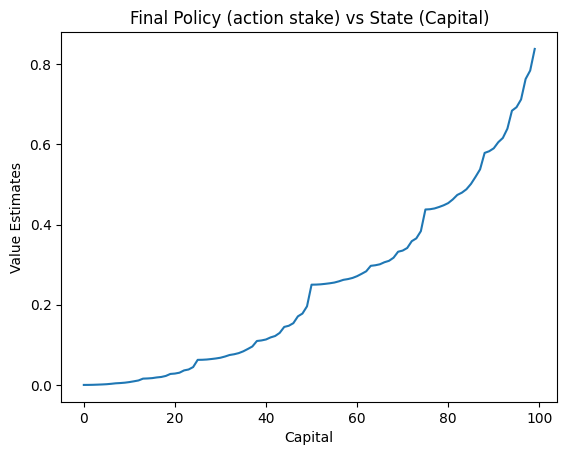

In [4]:

x = range(100)
y = v[:100]
plt.plot(x, y)
plt.xlabel('Capital')

plt.ylabel('Value Estimates')
plt.title('Final Policy (action stake) vs State (Capital)')

plt.show()

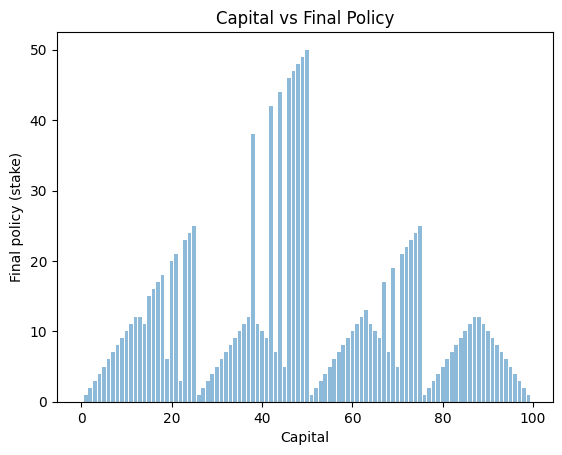

In [5]:

x = range(100)
y = policy
plt.bar(x, y, align='center', alpha=0.5)
plt.xlabel('Capital')
plt.ylabel('Final policy (stake)')
plt.title('Capital vs Final Policy')

plt.show()